TP Apprentissage supervisé : méthodes d'ensembles 5 SDBD
Ramouche Josua & Cossoul Lucile

In [5]:
import pandas
import joblib
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics 

dataset = pandas.read_csv('alt_acsincome_ca_features_85(1).csv')
labels = pandas.read_csv('alt_acsincome_ca_labels_85.csv')

labels["PINCP"] = labels["PINCP"].astype(int)

dataset["PINCP"] = labels["PINCP"]



print(dataset)
print(len(dataset))


        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P  PINCP
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0      1
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0      1
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0      0
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0      1
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0      0
...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...    ...
166310  25.0  1.0  20.0  1.0  4720.0    6.0   7.0   8.0  2.0    1.0      0
166311  34.0  1.0  22.0  1.0   110.0  210.0   0.0  40.0  1.0    6.0      1
166312  54.0  3.0  18.0  1.0  7700.0    6.0   1.0  50.0  1.0    1.0      1
166313  39.0  1.0  16.0  5.0  9130.0    6.0   0.0  50.0  1.0    1.0      1
166314  32.0  1.0   9.0  5.0  4020.0  303.0   0.0  40.0  2.0    8.0      0

[166315 rows x 11 columns]
166315


In [6]:
import random
from sklearn.model_selection import train_test_split

dataset = dataset.sample(frac=1)


X = dataset.loc[:, dataset.columns != 'PINCP']

y = dataset['PINCP']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.2)



#normalize OCCP and WKHP because they are not in the same scale as the other features
my_scaler_OCCP = preprocessing.StandardScaler()
X_train["OCCP"] = my_scaler_OCCP.fit_transform(X_train[["OCCP"]])
joblib.dump(my_scaler_OCCP,'scaler.joblib')
X_test["OCCP"] = my_scaler_OCCP.transform(X_test[["OCCP"]])
my_scaler_WKHP = preprocessing.StandardScaler()
X_train["WKHP"] = my_scaler_WKHP.fit_transform(X_train[["WKHP"]])
joblib.dump(my_scaler_WKHP,'scaler.joblib')
X_test["WKHP"] = my_scaler_WKHP.transform(X_test[["WKHP"]])



print(X_train)


        AGEP  COW  SCHL  MAR      OCCP   POBP  RELP      WKHP  SEX  RAC1P
146354  26.0  1.0  20.0  5.0 -0.006092   53.0   2.0  0.164857  2.0    1.0
6594    63.0  1.0  20.0  1.0  0.654236   36.0   0.0 -2.598772  2.0    1.0
136478  64.0  4.0  21.0  1.0 -0.647445    6.0   1.0  0.164857  1.0    1.0
105335  47.0  7.0  24.0  1.0 -0.727140    6.0   0.0  1.700207  1.0    1.0
132928  43.0  1.0  16.0  1.0  1.257639    6.0   0.0  0.164857  1.0    2.0
...      ...  ...   ...  ...       ...    ...   ...       ...  ...    ...
45058   19.0  1.0  16.0  5.0  2.126692   34.0   0.0  0.164857  1.0    2.0
3133    60.0  1.0  20.0  1.0 -0.937762    6.0   0.0  0.164857  1.0    1.0
62623   28.0  2.0  21.0  5.0 -0.759777    6.0  13.0  0.164857  2.0    1.0
40299   46.0  4.0  22.0  1.0 -0.647445    6.0   2.0 -0.602817  2.0    1.0
100108  32.0  1.0  19.0  1.0  1.417029  303.0   5.0  0.164857  2.0    1.0

[133052 rows x 10 columns]


Random Forest Training score :  0.9980834560923548
Random Forest Testing score : 0.8149595646814779
Random Forest Testing prediction : [1 0 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     19550
           1       0.78      0.76      0.77     13713

    accuracy                           0.81     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.81      0.81      0.81     33263



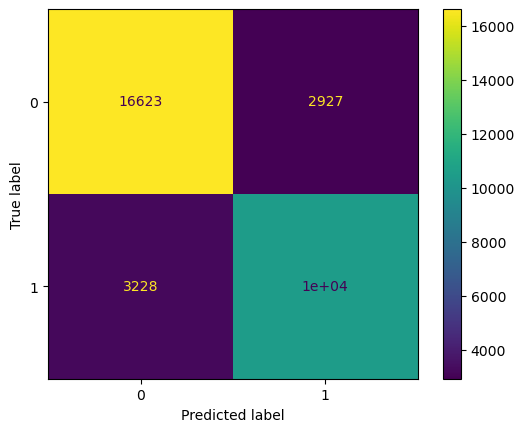

In [4]:
#Random Forest
import sklearn.ensemble as ensemble

model_random_forest = ensemble.RandomForestClassifier()
model_random_forest.fit(X_train, y_train)
print("Random Forest Training score : ", model_random_forest.score(X_train, y_train))

print("Random Forest Testing score :", model_random_forest.score(X_test, y_test))

prediction_rf = model_random_forest.predict(X_test)
print("Random Forest Testing prediction :", prediction_rf)

#Evaluation
class_report_random_forest = metrics.classification_report(y_test, prediction_rf)
print(class_report_random_forest)

confusion_matrix_random_forest = metrics.confusion_matrix(y_test, model_random_forest.predict(X_test))
cm_display_random_forest = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_random_forest, display_labels=[0,1])
cm_display_random_forest.plot()
plt.show()

/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Training score :  0.8086988545831705
Ada Boost Testing score : 0.811261762318492
Ada Boost prediction : [1 0 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19550
           1       0.77      0.77      0.77     13713

    accuracy                           0.81     33263
   macro avg       0.81      0.80      0.81     33263
weighted avg       0.81      0.81      0.81     33263



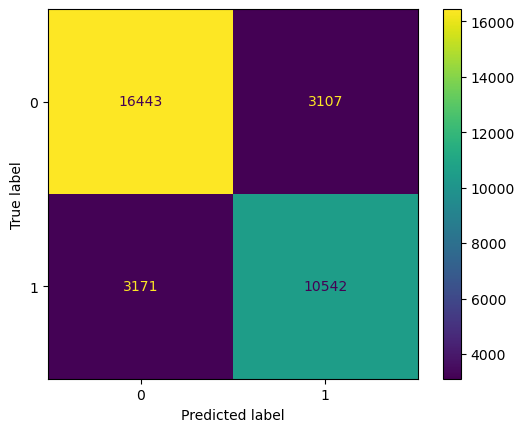

In [5]:
#Ada Boost
import sklearn.ensemble as ensemble
from sklearn import metrics 

model_ada_boost = ensemble.AdaBoostClassifier()
model_ada_boost.fit(X_train, y_train)
print("Ada Boost Training score : ", model_ada_boost.score(X_train, y_train))

print("Ada Boost Testing score :", model_ada_boost.score(X_test, y_test))

prediction_ada = model_ada_boost.predict(X_test)
print("Ada Boost prediction :", prediction_ada)

#Evaluation 
class_report_ada = metrics.classification_report(y_test, prediction_ada)
print(class_report_ada)

confusion_matrix_ada_boost = metrics.confusion_matrix(y_test, model_ada_boost.predict(X_test))
cm_display_ada_boost = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ada_boost, display_labels=[0,1])
cm_display_ada_boost.plot()
plt.show()

XG Boost Training score :  0.8436626281453867
XG Boost Testing score : 0.8261732255058173
XG Boost prediction : [1 0 0 ... 1 0 1]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     19550
           1       0.79      0.79      0.79     13713

    accuracy                           0.83     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.83      0.83      0.83     33263



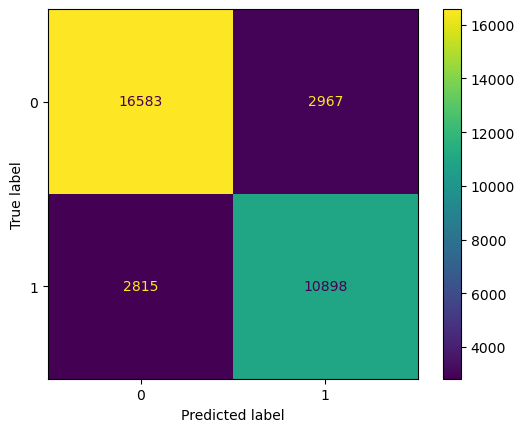

In [6]:
#XG Boost
from xgboost import XGBClassifier

model_xg_boost = XGBClassifier()
model_xg_boost.fit(X_train, y_train)
print("XG Boost Training score : ", model_xg_boost.score(X_train, y_train))

print("XG Boost Testing score :", model_xg_boost.score(X_test, y_test))

prediction_xg = model_xg_boost.predict(X_test)
print("XG Boost prediction :", prediction_xg)

#Evaluation 
class_report_xg = metrics.classification_report(y_test, prediction_xg)
print(class_report_xg)

confusion_matrix_xg_boost = metrics.confusion_matrix(y_test, model_xg_boost.predict(X_test))
cm_display_xg_boost = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xg_boost, display_labels=[0,1])
cm_display_xg_boost.plot()
plt.show()

/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Stacking Testing score : 0.8280070949703875
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     19550
           1       0.79      0.79      0.79     13713

    accuracy                           0.83     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.83      0.83      0.83     33263



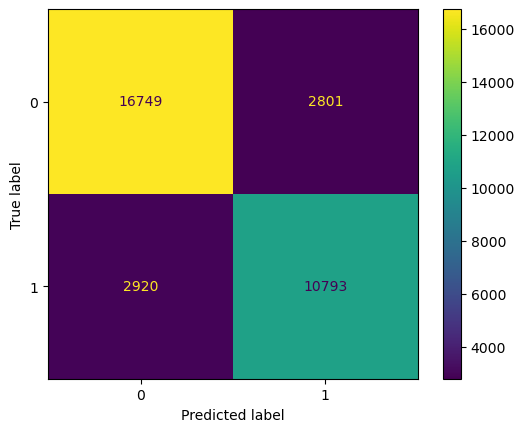

In [8]:
#Stacking RandomForest, AdaBoost and XGBoost
import sklearn.ensemble as ensemble
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

models = [('rf', ensemble.RandomForestClassifier()), ('ab', ensemble.AdaBoostClassifier()), ('xb',XGBClassifier())]
stacking_model = ensemble.StackingClassifier(estimators=models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Testing score :", stacking_model.score(X_test, y_test))

#Evaluation 
class_report_stacking = metrics.classification_report(y_test, y_pred_stacking)
print(class_report_stacking)

confusion_matrix_stacking = metrics.confusion_matrix(y_test, stacking_model.predict(X_test))
cm_display_stacking = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_stacking, display_labels=[0,1])
cm_display_stacking.plot()
plt.show()


Random Forest Training score with Cross Validation:  [0.81139378 0.81169441 0.81897783 0.81390455 0.82003006]
Random Forest Prediction with Cross Validation:  [0 0 1 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     19564
           1       0.77      0.75      0.76     13699

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263



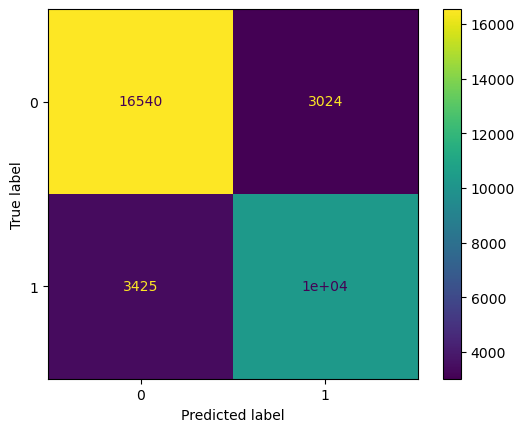

In [ ]:
#Random Forest With Cross Validation 

import sklearn.ensemble as ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model_random_forest_cv = ensemble.RandomForestClassifier()
cv_score = cross_val_score(model_random_forest_cv,X_train, y_train,cv=5,scoring='accuracy')
print("Random Forest Training score with Cross Validation: ", cv_score)

cv_predict = cross_val_predict(model_random_forest_cv, X_test, y_test, cv=5)
print("Random Forest Prediction with Cross Validation: ", cv_predict)

#Evaluation
class_report_random_forest_cv = metrics.classification_report(y_test, cv_predict)
print(class_report_random_forest_cv)

confusion_matrix_random_forest_cv = metrics.confusion_matrix(y_test, cv_predict)
cm_display_random_forest_cv = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_random_forest_cv, display_labels=[0,1])
cm_display_random_forest_cv.plot()
plt.show()


/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will 

Ada Boost Training score with Cross Validation:  [0.80594491 0.80729773 0.81390455 0.8100714  0.80875611]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     19564
           1       0.77      0.76      0.76     13699

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263



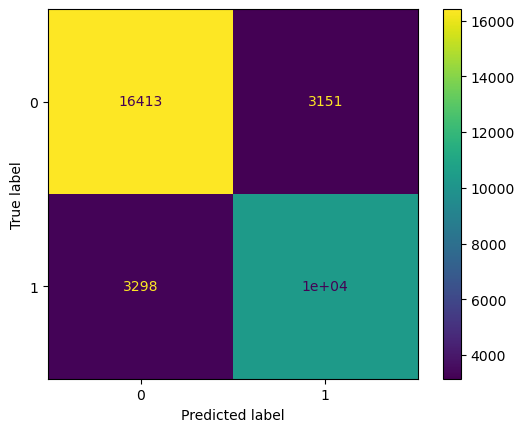

In [ ]:
#Ada Boost With Cross Validation 

import sklearn.ensemble as ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model_ada_cv = ensemble.AdaBoostClassifier()
cv_score = cross_val_score(model_ada_cv,X_train, y_train,cv=5,scoring='accuracy')
cv_predict = cross_val_predict(model_ada_cv,X_test,y_test,cv=5)
print("Ada Boost Training score with Cross Validation: ", cv_score)


#Evaluation
class_report_ada_cv = metrics.classification_report(y_test, cv_predict)
print(class_report_ada_cv)

confusion_matrix_ada_cv = metrics.confusion_matrix(y_test, cv_predict)
cm_display_ada_cv = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_ada_cv, display_labels=[0,1])
cm_display_ada_cv.plot()
plt.show()

XG Boost Training score with Cross Validation:  [0.8221788  0.82123934 0.82769635 0.82675686 0.82491545]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84     19564
           1       0.78      0.77      0.78     13699

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263



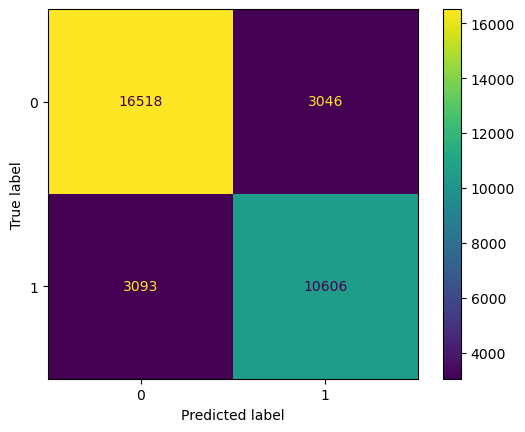

In [ ]:
#XG Boost With Cross Validation 

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

model_xg_cv = XGBClassifier()
cv_score = cross_val_score(model_xg_cv,X_train, y_train,cv=5,scoring='accuracy')
print("XG Boost Training score with Cross Validation: ", cv_score)

cv_predict = cross_val_predict(model_xg_cv,X_test, y_test, cv=5)

#Evaluation
class_report_stacking_cv = metrics.classification_report(y_test, cv_predict)
print(class_report_stacking_cv)

confusion_matrix_stacking_cv = metrics.confusion_matrix(y_test, cv_predict)
cm_display_stacking_cv = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_stacking_cv, display_labels=[0,1])
cm_display_stacking_cv.plot()
plt.show()

/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will 

Stacking Training score with Cross Validation:  [0.82353162 0.82255458 0.82889891 0.82675686 0.8263059 ]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     19564
           1       0.79      0.77      0.78     13699

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263



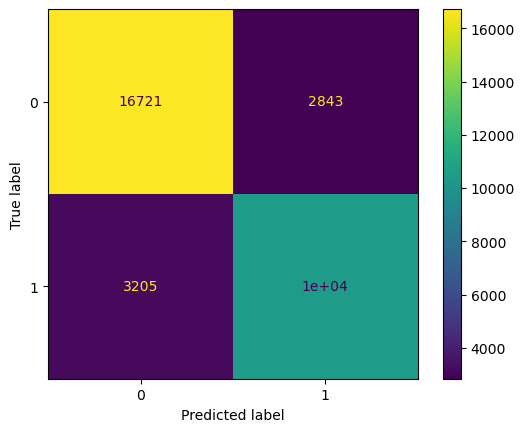

In [ ]:
#Stacking With Cross Validation 

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as ensemble
from sklearn.linear_model import LogisticRegression

models = [('rf', ensemble.RandomForestClassifier()), ('ab', ensemble.AdaBoostClassifier()), ('xb',XGBClassifier())]
stacking_model = ensemble.StackingClassifier(estimators=models, final_estimator=LogisticRegression())
cv_score = cross_val_score(stacking_model,X_train, y_train,cv=5,scoring='accuracy')
cv_predict = cross_val_predict(stacking_model,X_test,y_test,cv=5)
print("Stacking Training score with Cross Validation: ", cv_score)

#Evaluation
class_report_stacking_cv = metrics.classification_report(y_test, cv_predict)
print(class_report_stacking_cv)

confusion_matrix_xg_cv = metrics.confusion_matrix(y_test, cv_predict)
cm_display_xg_cv = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xg_cv, display_labels=[0,1])
cm_display_xg_cv.plot()
plt.show()

Chaque modèle utilise les paramètres par défaut. 166635 lignes.
||Random Forest|Ada Boost|XG Boost|Stacking|
| --- | --- | --- |---|---|
|Runtime|15s|2,8s|0,4s|1,17s|
|Accuracy|81,1%|80,6%|82,4%|82,3%|
|Faux positifs|2,0%|2,0%|1,8%|1,9%|
|Faux négatifs|1,8%|1,8%|1,7%|1,7%|
|5 Cross Validation|81%|81%|82%|82%|
|GridSearch|Random Forest Best Score :  0.8155308047149326 Random Forest Best parameters : {'max_depth': 10, 'n_estimators': 500}|Ada Boost Best Score :  0.8190858075194765Ada Boost Best parameters : {'learning_rate': 1, 'n_estimators': 500}|XG Boost Best Score :  0.8257448407202798 XG Boost Best parameters : {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}||


In [ ]:
# Random Forest GridSearchCV (Best Model)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np  

param_grid_rf =  {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 200, 300, 400, 500]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)

grid_rf.fit(X_train,y_train)

print('Random Forest Best Score : ', grid_rf.best_score_)
print('Random Forest Best parameters :', grid_rf.best_params_)

/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest Best Score :  0.8155308047149326
Random Forest Best parameters : {'max_depth': 10, 'n_estimators': 500}


In [ ]:
# Ada Boost GridSearchCV (Best Model)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
import numpy as np  

param_grid_ada =  {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1,0]
}

grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5)

grid_ada.fit(X_train,y_train)

print('Ada Boost Best Score : ', grid_ada.best_score_)
print('Ada Boost Best parameters :', grid_ada.best_params_)

/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/cossoul/.conda/envs/tp-supervise/lib/python3.13/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will 

Ada Boost Best Score :  0.8190858075194765
Ada Boost Best parameters : {'learning_rate': 1, 'n_estimators': 500}


In [ ]:
# XG Boost GridSearchCV (Best Model)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import numpy as np  

param_grid_xg =  {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

param_grid_xg = GridSearchCV(XGBClassifier(), param_grid_xg, cv=5)

param_grid_xg.fit(X_train,y_train)

print('XG Boost Best Score : ', param_grid_xg.best_score_)
print('XG Boost Best parameters :', param_grid_xg.best_params_)

XG Boost Best Score :  0.8257448407202798
XG Boost Best parameters : {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.8}


Bests models :
RandomForestClassifier(max_depth=10, n_estimators=500)
AdaBoostClassifier(learning_rate=1, n_estimators=500)
XGBClassifier(colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8)

In [ ]:
#Best model Random Forest
model_best_rf = ensemble.RandomForestClassifier(max_depth=10, n_estimators=500)
model_best_rf.fit(X_train, y_train)
y_pred_best_rf = model_best_rf.predict(X_test)
print("Best model Random Forest: ", metrics.accuracy_score(y_test, y_pred_best_rf))
#save on joblib
joblib.dump(model_best_rf,'RandomForest_BestModel_08158.joblib')

Best model Random Forest:  0.8158013408291495


['RandomForest_BestModel_08158.joblib']

In [13]:
#Best model Ada Boost
model_best_ada = ensemble.AdaBoostClassifier(learning_rate=0.1, n_estimators=500)
model_best_ada.fit(X_train, y_train)
y_pred_best_ada = model_best_ada.predict(X_test)
print("Best model Ada Boost: ", metrics.accuracy_score(y_test, y_pred_best_ada))
#save on joblib
joblib.dump(model_best_ada,'AdaBoost_BestModel_08114.joblib')

/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best model Ada Boost:  0.81147220635541


['AdaBoost_BestModel_08114.joblib']

In [15]:
#Best model XG Boost
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
model_best_xg = XGBClassifier(colsample_bytree=0.6, gamma=0.5, max_depth=5, min_child_weight=1, subsample=0.6)
model_best_xg.fit(X_train, y_train)
y_pred_best_xg = model_best_xg.predict(X_test)
print("Best model XG Boost: ", metrics.accuracy_score(y_test, y_pred_best_xg))
#save on joblib
joblib.dump(model_best_xg,'XGBoost_BestModel_082632.joblib')

Best model XG Boost:  0.8263235426750444


['XGBoost_BestModel_082632.joblib']

In [16]:
# Stacking with best parameters of GrisSearchCV of models

import sklearn.ensemble as ensemble
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

models = [('rf', ensemble.RandomForestClassifier(max_depth=10, n_estimators=500)), ('ab', ensemble.AdaBoostClassifier(learning_rate=1, n_estimators=500)), 
          ('xb',XGBClassifier(colsample_bytree=0.8, gamma=0.5, max_depth=5, min_child_weight=10, subsample=0.8))]
stacking_model = ensemble.StackingClassifier(estimators=models, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
print("Stacking Testing score :", stacking_model.score(X_test, y_test))

#save on joblib
joblib.dump(model_best_xg,'Stacking_BestModel_082671.joblib')


/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent

Stacking Testing score : 0.8263836695427351


['Stacking_BestModel_082671.joblib']

Best parameters pour chaque modèle et Stacking :
||Random Forest|Ada Boost|XG Boost|Stacking|
| --- | --- | --- |---|---|
|Runtime|30s|21s|0,3s|4min15s|
|Accuracy|81,5%|81,1%|82,6%|82,6%|



In [44]:
#number of people in California
print("Number of people in California : ", len(dataset))
#number of people in California with income > 50k
print("Number of people in California with income > 50k : ", len(dataset[dataset["PINCP"]==1]))
#ratio of people in California with income > 50k
print("Ratio of people in California with income > 50k : ", len(dataset[dataset["PINCP"]==1])/len(dataset))
#attributes of the dataset
print("Attributes of the dataset : ", dataset.columns)

Number of people in California :  166315
Number of people in California with income > 50k :  68203
Ratio of people in California with income > 50k :  0.4100832757117518
Attributes of the dataset :  Index(['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX',
       'RAC1P', 'PINCP'],
      dtype='object')


In [45]:
#Appliquer le meilleur modèle XG Boost sur un nouveau jeu de données : Colorado
#acsincome_co_features.csv
#acsincome_co_labels.csv
dataset_co = pandas.read_csv('acsincome_co_features.csv')
dataset_co_labels = pandas.read_csv('acsincome_co_label.csv')

#run XG BOOST model on Colorado dataset from XGBoost_BestModel_082632.joblib
best_model = joblib.load('XGBoost_BestModel_082632.joblib')
best_model.predict(dataset_co)
print("Colorado dataset prediction : ", best_model.predict(dataset_co))
print("Colorado dataset score : ", best_model.score(dataset_co, dataset_co_labels))

#number of people 
print("Number of people in Colorado dataset : ", len(dataset_co))

#number of people with income > 50k
print("Number of people with income > 50k in Colorado dataset : ", sum(best_model.predict(dataset_co)))

#ratio of people with income > 50k
print("Ratio of people with income > 50k in Colorado dataset : ", sum(best_model.predict(dataset_co))/len(dataset_co))

#attributes of the dataset
print("Attributes of the Colorado dataset : ", dataset_co.columns)

Colorado dataset prediction :  [0 0 0 ... 1 1 1]
Colorado dataset score :  0.6659106880470197
Number of people in Colorado dataset :  31306
Number of people with income > 50k in Colorado dataset :  20555
Ratio of people with income > 50k in Colorado dataset :  0.6565834025426436
Attributes of the Colorado dataset :  Index(['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX',
       'RAC1P'],
      dtype='object')


In [46]:
#Appliquer le le meilleur modèle XG Boost sur un nouveau jeu de données : Nevada
#acsincome_ne_features.csv
#acsincome_ne_labels.csv
dataset_ne = pandas.read_csv('acsincome_ne_features.csv')
dataset_ne_labels = pandas.read_csv('acsincome_ne_label.csv')

#run XG BOOST model on Colorado dataset from XGBoost_BestModel_082632.joblib
best_model = joblib.load('XGBoost_BestModel_082632.joblib')
best_model.predict(dataset_ne)
print("Colorado dataset prediction : ", best_model.predict(dataset_ne))
print("Colorado dataset score : ", best_model.score(dataset_ne, dataset_ne_labels))

#number of people 
print("Number of people in Nevada dataset : ", len(dataset_ne))

#number of people with income > 50k
print("Number of people with income > 50k in Nevada dataset : ", sum(best_model.predict(dataset_ne)))

#ratio of people with income > 50k
print("Ratio of people with income > 50k in Nevada dataset : ", sum(best_model.predict(dataset_ne))/len(dataset_ne))

#attributes of the dataset
print("Attributes of the Nevada dataset : ", dataset_ne.columns)

Colorado dataset prediction :  [0 0 0 ... 1 1 1]
Colorado dataset score :  0.5821974965229485
Number of people in Nevada dataset :  10785
Number of people with income > 50k in Nevada dataset :  7384
Ratio of people with income > 50k in Nevada dataset :  0.6846546128882708
Attributes of the Nevada dataset :  Index(['AGEP', 'COW', 'SCHL', 'MAR', 'OCCP', 'POBP', 'RELP', 'WKHP', 'SEX',
       'RAC1P'],
      dtype='object')


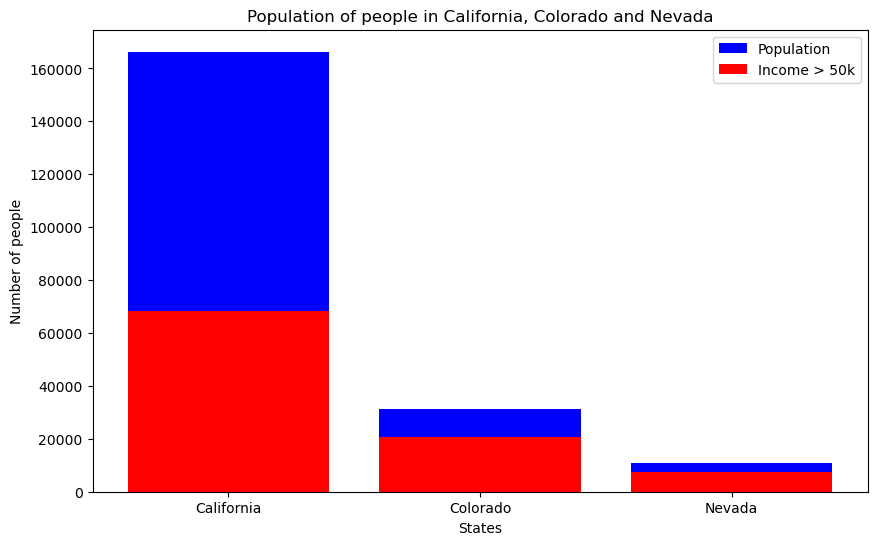

In [ ]:
#plot comparison between California, Colorado and Nevada datasets population and income > 50k
plt.figure(figsize=(10,6))
plt.bar(['California', 'Colorado', 'Nevada'], [len(dataset), len(dataset_co), len(dataset_ne)], color='blue')
#add number of people with income > 50k
plt.bar(['California', 'Colorado', 'Nevada'], [len(dataset[dataset["PINCP"]==1]), sum(best_model.predict(dataset_co)), sum(best_model.predict(dataset_ne))], color='red')
plt.legend(['Population', 'Income > 50k'])
plt.title('Population and Income > 50k in California, Colorado and Nevada')
plt.xlabel('States')
plt.ylabel('Number of people')
plt.title('Population of people in California, Colorado and Nevada')
plt.show()



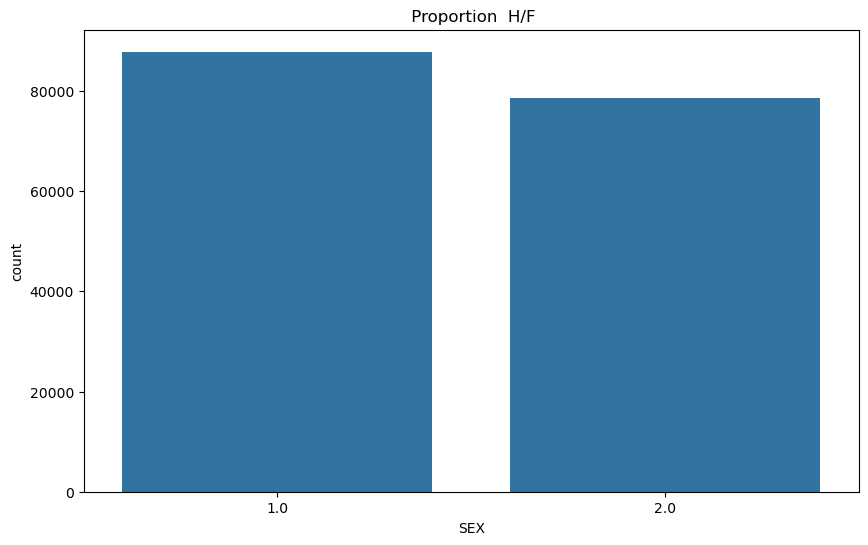

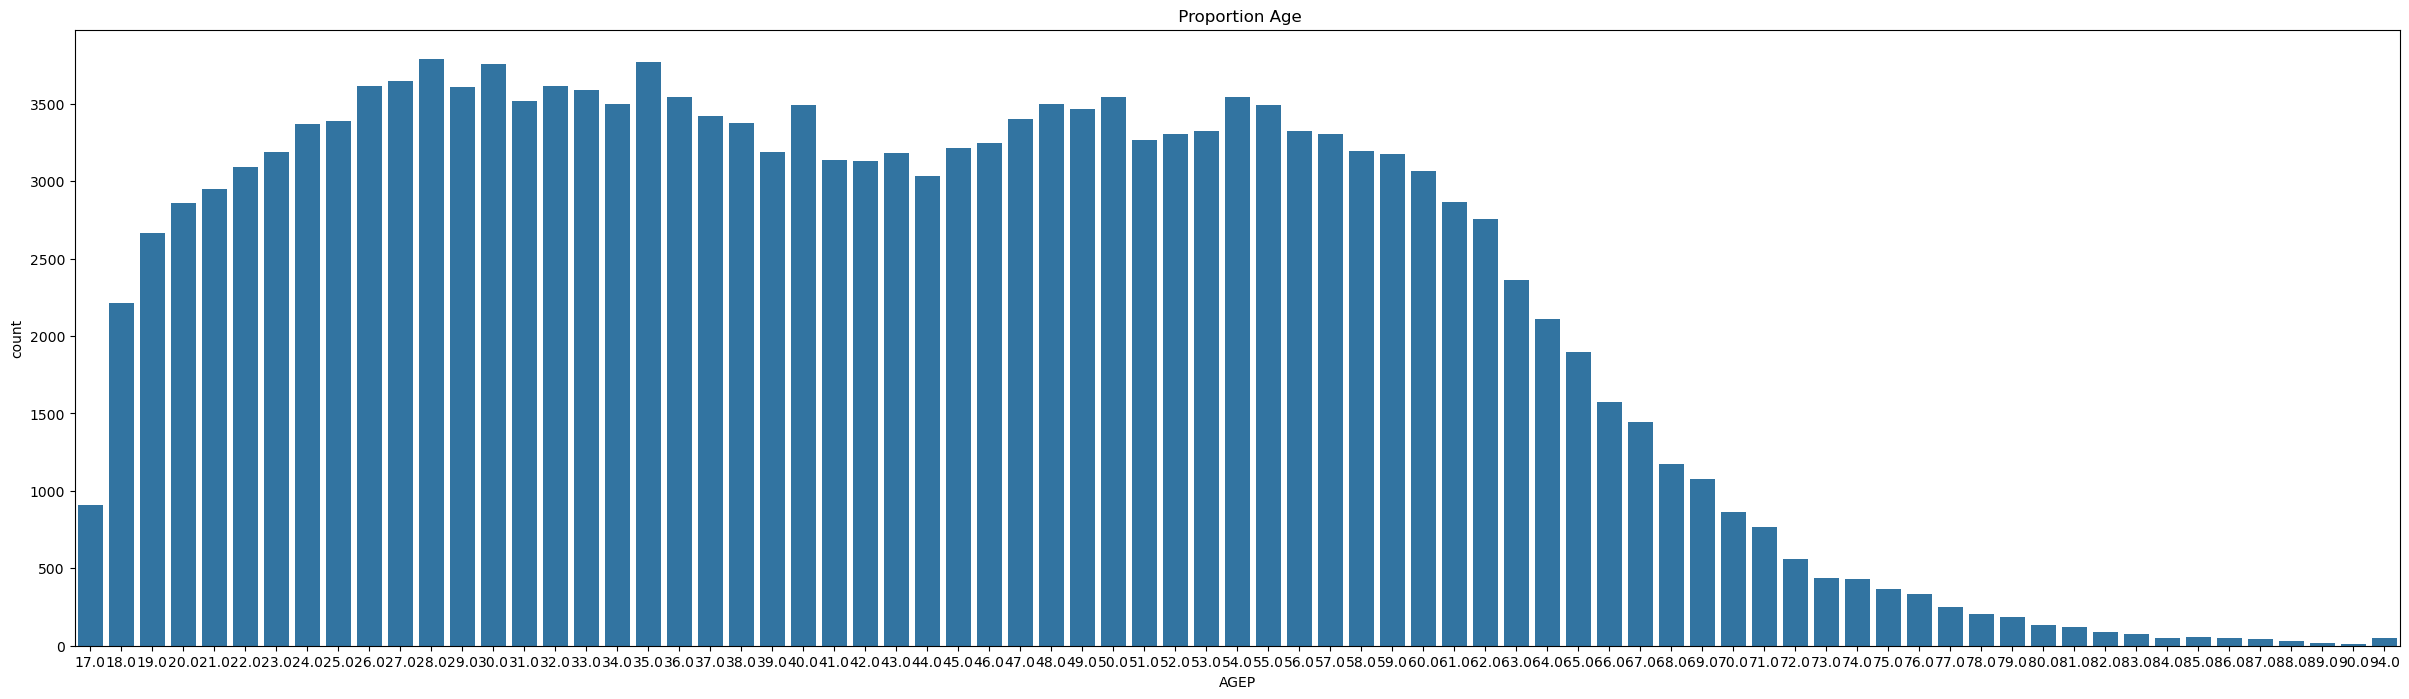

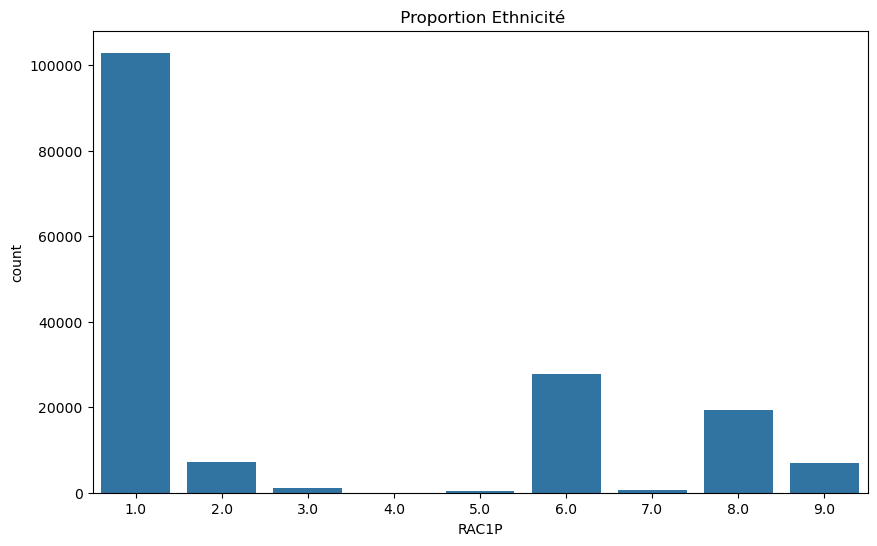

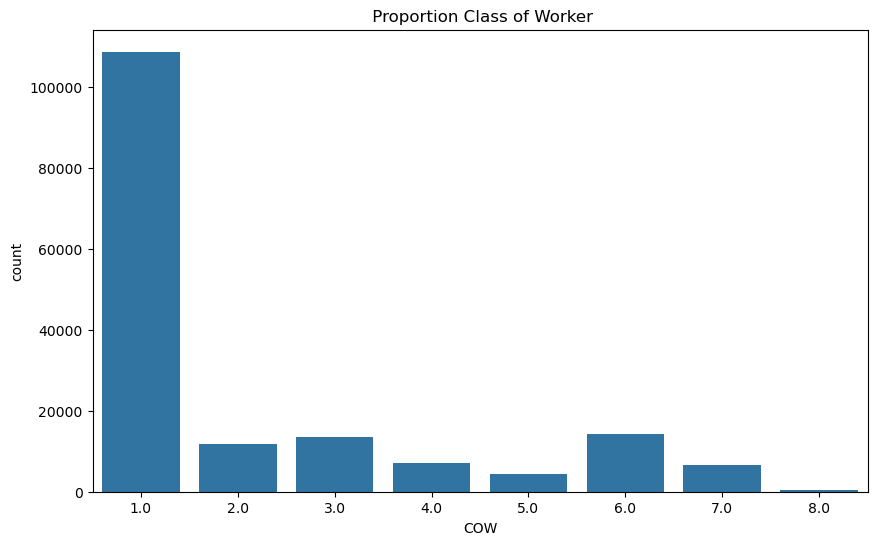

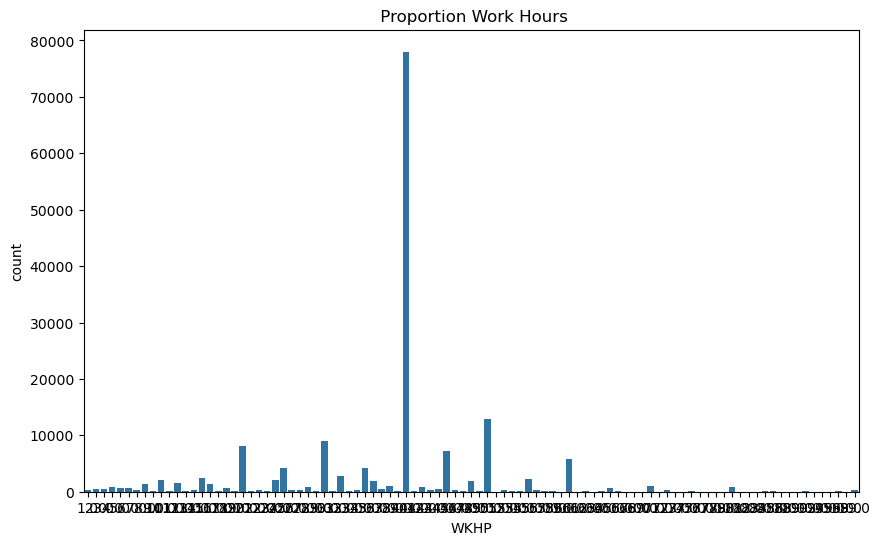

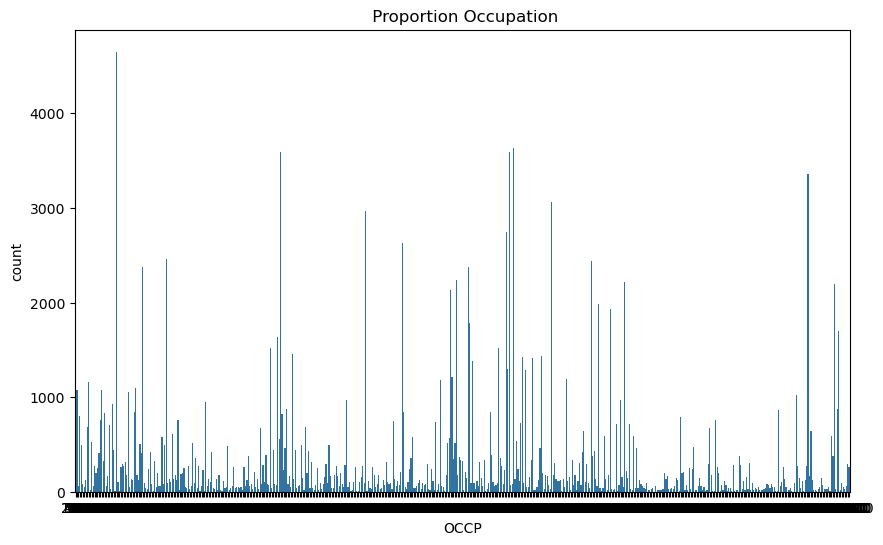

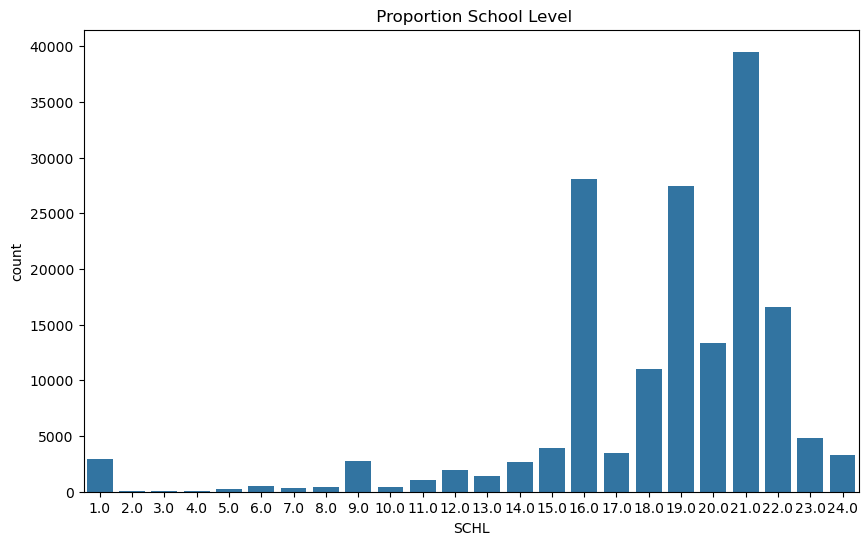

<Axes: >

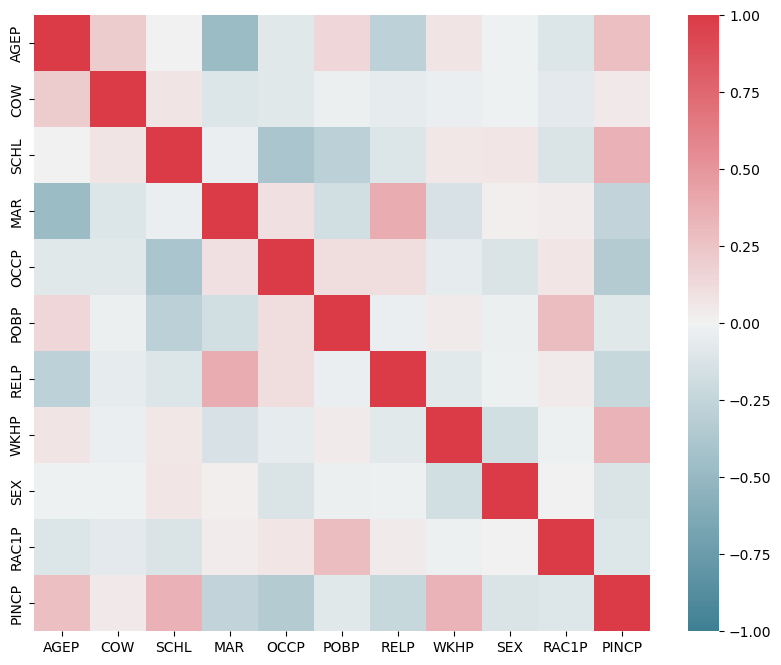

In [1]:
# Analyse du dataset 
import pandas
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

dataset = pandas.read_csv('alt_acsincome_ca_features_85(1).csv')
labels = pandas.read_csv('alt_acsincome_ca_labels_85.csv')

labels["PINCP"] = labels["PINCP"].astype(int)

dataset["PINCP"] = labels["PINCP"]

# Proportion H/F
sex = dataset["SEX"]
plt.figure(figsize=(10,6))
sns.countplot
sns.countplot(x=sex, data=dataset)
plt.title(' Proportion  H/F')
plt.show()


# Proportion Age
age = dataset["AGEP"]
plt.figure(figsize=(30,8))
sns.countplot(x=age, data=dataset)
plt.title(' Proportion Age')
plt.show()

# Proportion Ethnicité
ethn = dataset["RAC1P"]
plt.figure(figsize=(10,6))
sns.countplot(x=ethn, data=dataset)
plt.title(' Proportion Ethnicité')
plt.show()

# Proportion Class of Worker including N/A values
cow = dataset["COW"]
plt.figure(figsize=(10,6))
sns.countplot(x=cow, data=dataset)
plt.title(' Proportion Class of Worker')
plt.show()

# Proportion Work Hours
wkhp = dataset["WKHP"]
plt.figure(figsize=(10,6))
sns.countplot(x=wkhp, data=dataset)
plt.title(' Proportion Work Hours')
plt.show()

# Proportion Occupation
occp = dataset["OCCP"]
plt.figure(figsize=(10,6))
sns.countplot(x=occp, data=dataset)
plt.title(' Proportion Occupation')
plt.show()

# Proportion School Level
schl = dataset["SCHL"]
plt.figure(figsize=(10,6))
sns.countplot(x=schl, data=dataset)
plt.title(' Proportion School Level')
plt.show()


# Correlation Matrix 
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P  PINCP  \
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0      1   
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0      1   
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0      0   
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0      1   
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0      0   
...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...    ...   
166310  25.0  1.0  20.0  1.0  4720.0    6.0   7.0   8.0  2.0    1.0      0   
166311  34.0  1.0  22.0  1.0   110.0  210.0   0.0  40.0  1.0    6.0      1   
166312  54.0  3.0  18.0  1.0  7700.0    6.0   1.0  50.0  1.0    1.0      1   
166313  39.0  1.0  16.0  5.0  9130.0    6.0   0.0  50.0  1.0    1.0      1   
166314  32.0  1.0   9.0  5.0  4020.0  303.0   0.0  40.0  2.0    8.0      0   

        Prediction  
0                1  
1                1  


<Axes: >

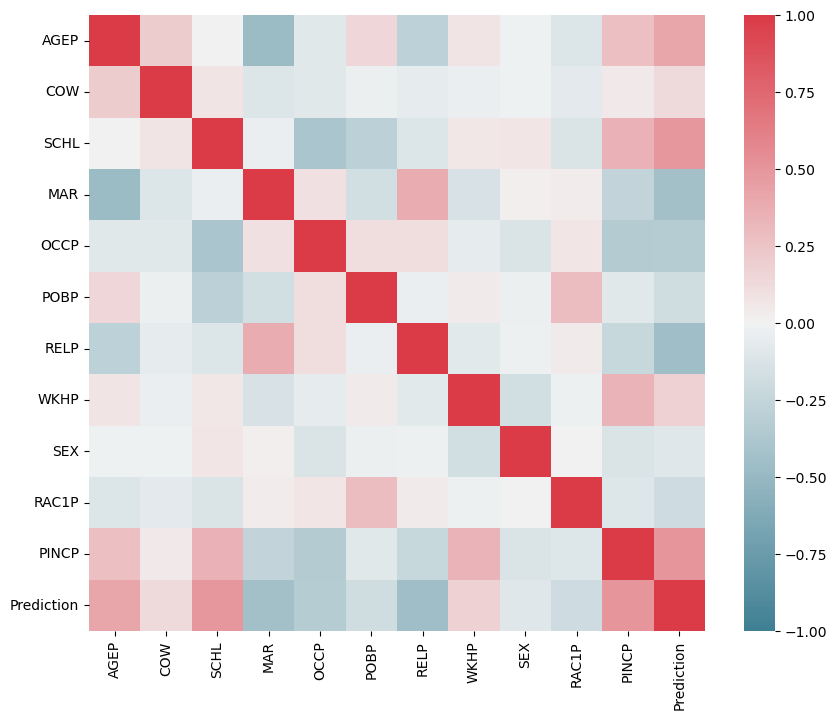

In [84]:
# Import joblib model
model_best_rf = joblib.load('RandomForest_BestModel_08158.joblib')
# Add Model prediction to dataset
rf_dataset = dataset
rf_dataset["Prediction"] = model_best_rf.predict(dataset.loc[:, dataset.columns != 'PINCP'])
print(rf_dataset)

# Correlation Matrix with prediction
f, ax = plt.subplots(figsize=(10, 8))
corr = rf_dataset.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)


        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P  PINCP  \
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0      1   
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0      1   
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0      0   
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0      1   
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0      0   
...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...    ...   
166310  25.0  1.0  20.0  1.0  4720.0    6.0   7.0   8.0  2.0    1.0      0   
166311  34.0  1.0  22.0  1.0   110.0  210.0   0.0  40.0  1.0    6.0      1   
166312  54.0  3.0  18.0  1.0  7700.0    6.0   1.0  50.0  1.0    1.0      1   
166313  39.0  1.0  16.0  5.0  9130.0    6.0   0.0  50.0  1.0    1.0      1   
166314  32.0  1.0   9.0  5.0  4020.0  303.0   0.0  40.0  2.0    8.0      0   

        Prediction  
0                1  
1                1  


<Axes: >

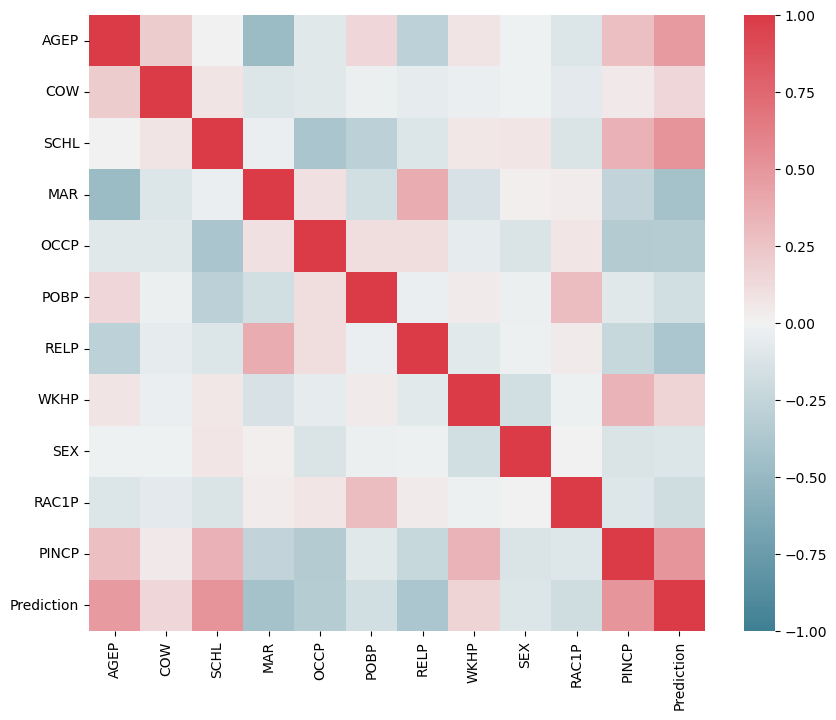

In [87]:
# Import joblib model
model_best_ada = joblib.load('AdaBoost_BestModel_08114.joblib')
# Add Model prediction to dataset
ada_dataset = dataset
ada_dataset["Prediction"] = model_best_ada.predict(dataset.loc[:, dataset.columns != 'PINCP'])
print(ada_dataset)

# Correlation Matrix with prediction
f, ax = plt.subplots(figsize=(10, 8))
corr = ada_dataset.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P  PINCP  \
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0      1   
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0      1   
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0      0   
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0      1   
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0      0   
...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...    ...   
166310  25.0  1.0  20.0  1.0  4720.0    6.0   7.0   8.0  2.0    1.0      0   
166311  34.0  1.0  22.0  1.0   110.0  210.0   0.0  40.0  1.0    6.0      1   
166312  54.0  3.0  18.0  1.0  7700.0    6.0   1.0  50.0  1.0    1.0      1   
166313  39.0  1.0  16.0  5.0  9130.0    6.0   0.0  50.0  1.0    1.0      1   
166314  32.0  1.0   9.0  5.0  4020.0  303.0   0.0  40.0  2.0    8.0      0   

        Prediction  
0                1  
1                1  


<Axes: >

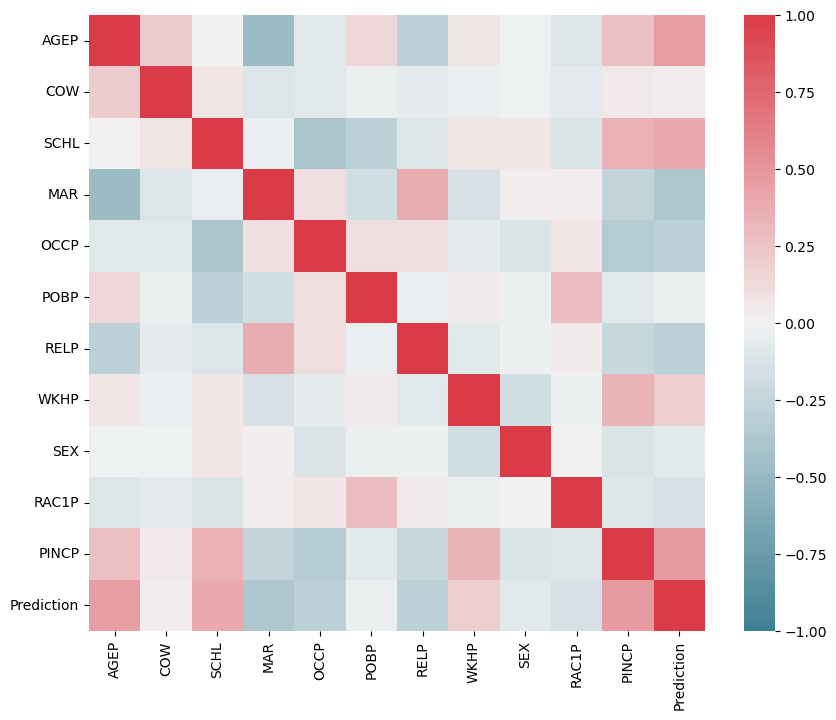

In [89]:
# Import joblib model
model_best_xg = joblib.load('XGBoost_BestModel_082632.joblib')
# Add Model prediction to dataset
xg_dataset = dataset
xg_dataset["Prediction"] = model_best_xg.predict(dataset.loc[:, dataset.columns != 'PINCP'])
print(xg_dataset)

# Correlation Matrix with prediction
f, ax = plt.subplots(figsize=(10, 8))
corr = xg_dataset.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [2]:
# Classement par ordre d'importance des features par nom (Random Forest)
importances = model_best_rf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

NameError: name 'model_best_rf' is not defined

In [ ]:
# Classement par ordre d'importance des features par nom (Ada Boost)
importances = model_best_ada.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [ ]:
# Classement par ordre d'importance des features par nom (XG Boost)
importances = model_best_xg.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

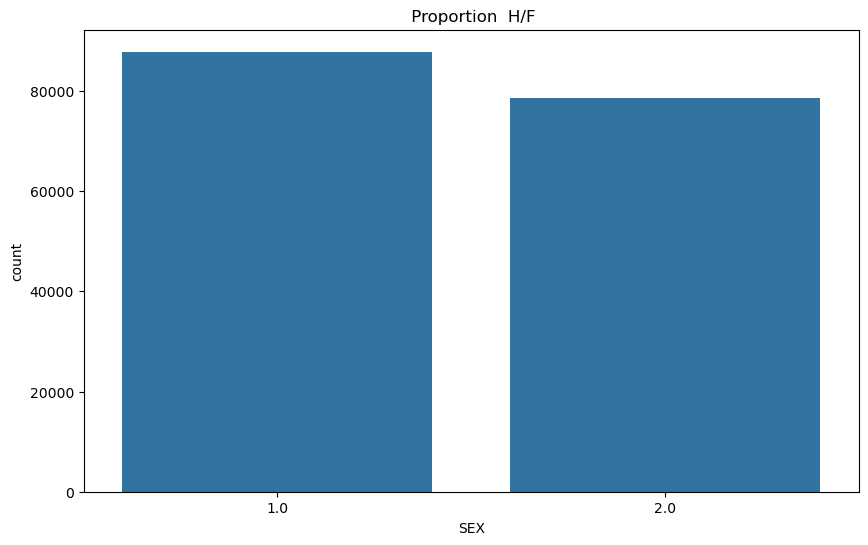

Pro portion of men > 50k
0.24571445750533627
Pro portion of women > 50k
0.16436881820641552


In [90]:
#Equité
# Proportion H/F
from numpy import mean


sex = dataset["SEX"]
plt.figure(figsize=(10,6))
sns.countplot(x=sex, data=dataset)
plt.title(' Proportion  H/F')
plt.show()

#sex==1.0, income > 50k
sex1 = dataset
sex1 = sex1[sex1['SEX'] == 1.0]
sex1 = sex1[sex1['PINCP'] ==1]
print("Pro portion of men > 50k")
print(len(sex1)/len(dataset))
#sex==2.0, income > 50k
sex2 = dataset
sex2 = sex2[sex2['SEX'] == 2.0]
sex2 = sex2[sex2['PINCP'] ==1]
print("Pro portion of women > 50k")
print(len(sex2)/len(dataset))



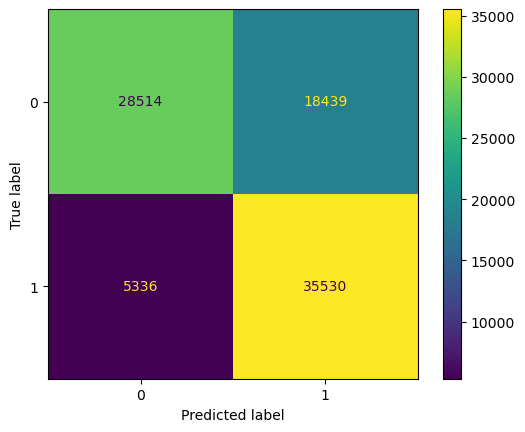

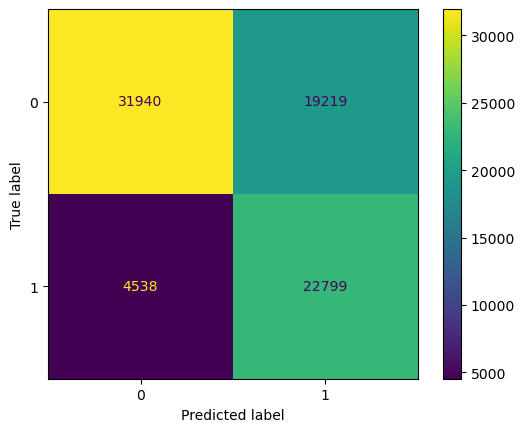

Taux de faux positifs pour les hommes
0.3416591005947859
Taux de faux positifs pour les femmes
0.4573992098624399
Taux de vrais positifs pour les hommes
0.6583408994052141
Taux de vrais positifs pour les femmes
0.5426007901375601
Taux de prédictions positives pour les hommes
0.8694269074536289
Taux de prédictions positives pour les femmes
0.8339978783333943


In [4]:
#import joblib model XG Boost
model_best_xg = joblib.load('XGBoost_BestModel_082632.joblib')
#matrice de confusion par genre (SEX==1.0 and SEX==2.0)
sex1 = dataset
sex1 = sex1[sex1['SEX'] == 1.0]
sex2 = dataset
sex2 = sex2[sex2['SEX'] == 2.0]
#matrice de confusion pour les deux genres
confusion_matrix_sex1 = metrics.confusion_matrix(sex1['PINCP'], model_best_xg.predict(sex1.loc[:, sex1.columns != 'PINCP']))
cm_display_sex1 = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_sex1, display_labels
=[0,1])
cm_display_sex1.plot()
plt.show()
confusion_matrix_sex2 = metrics.confusion_matrix(sex2['PINCP'], model_best_xg.predict(sex2.loc[:, sex2.columns != 'PINCP']))
cm_display_sex2 = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_sex2, display_labels
=[0,1])
cm_display_sex2.plot()
plt.show()
#compraison taux de faux positifs pour chaque genre
print("Taux de faux positifs pour les hommes")
print(confusion_matrix_sex1[0][1]/( confusion_matrix_sex1[0][1]+confusion_matrix_sex1[1][1]))
print("Taux de faux positifs pour les femmes")
print(confusion_matrix_sex2[0][1]/( confusion_matrix_sex2[0][1]+confusion_matrix_sex2[1][1]))
#compraison taux de vrais positifs pour chaque genre
print("Taux de vrais positifs pour les hommes")
print(confusion_matrix_sex1[1][1]/( confusion_matrix_sex1[0][1]+confusion_matrix_sex1[1][1]))
print("Taux de vrais positifs pour les femmes") 
print(confusion_matrix_sex2[1][1]/( confusion_matrix_sex2[0][1 ]+confusion_matrix_sex2[1][1]))
# taux de prédictions positives pour chaque genre
print("Taux de prédictions positives pour les hommes")
print(confusion_matrix_sex1[1][1]/( confusion_matrix_sex1[1][0]+confusion_matrix_sex1[1][1]))
print("Taux de prédictions positives pour les femmes")
print(confusion_matrix_sex2[1][1]/( confusion_matrix_sex2[1][0]+confusion_matrix_sex2[1][1]))



Score sans homme
<bound method ClassifierMixin.score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>
Matrice de confusion sans homme
[[8938 1249]
 [1435 4078]]


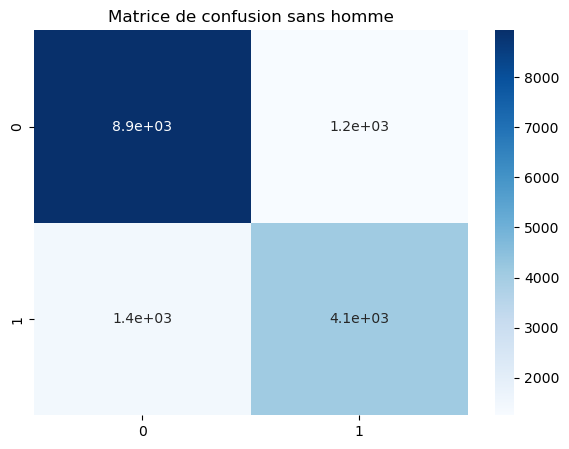

Score sans femme
<bound method ClassifierMixin.score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)>
Matrice de confusion sans femme
[[7697 1700]
 [1544 6623]]


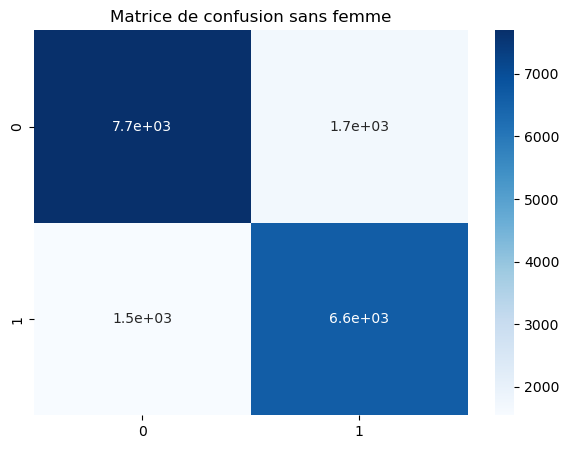

In [8]:
#import joblib model XG Boost
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
import joblib
model_best_xg = joblib.load('XGBoost_BestModel_082632.joblib')
#relance entrainement sans homme puis sans femme
#sans homme
sex2 = dataset
sex2 = sex2[sex2['SEX'] == 2.0] 
#sans femme
sex1 = dataset
sex1 = sex1[sex1['SEX'] == 1.0]

#entrainement sans homme
X_train_sex2, X_test_sex2, y_train_sex2, y_test_sex2 = train_test_split(sex2.loc[:, sex2.columns != 'PINCP'], sex2['PINCP'],test_size =0.2)
model_best_xg.fit(X_train_sex2, y_train_sex2)
#score sans homme
print("Score sans homme")
print(model_best_xg.score)
#matrice de confusion par genre
from sklearn.metrics import confusion_matrix
#sans homme
y_pred_sex2 = model_best_xg.predict(X_test_sex2)
confusion_matrix_sex2 = confusion_matrix(y_test_sex2, y_pred_sex2)
print("Matrice de confusion sans homme")
print(confusion_matrix_sex2)
#plot de la confusion matrice 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_sex2, annot=True, cmap='Blues')
plt.title('Matrice de confusion sans homme')
plt.show()





model_best_xg = joblib.load('XGBoost_BestModel_082632.joblib')
#entrainement sans femme
X_train_sex1, X_test_sex1, y_train_sex1, y_test_sex1 = train_test_split(sex1.loc[:, sex1.columns != 'PINCP'], sex1['PINCP'],test_size =0.2)
model_best_xg.fit(X_train_sex1, y_train_sex1)
#score sans femme
print("Score sans femme")
print(model_best_xg.score)
#sans femme
y_pred_sex1 = model_best_xg.predict(X_test_sex1)
confusion_matrix_sex1 = confusion_matrix(y_test_sex1, y_pred_sex1)
print("Matrice de confusion sans femme")
print(confusion_matrix_sex1)

#plot de la confusion matrice
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix_sex1, annot=True, cmap='Blues')
plt.title('Matrice de confusion sans femme')
plt.show()



